In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_excel('../data/County__Age_Group__Race_Ethnicity__and_Sex___2010-2019.xlsx')

In [3]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [4]:
df = df.sort_values(by = 'Year')

df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
320534,2010,GA,Camden,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1738.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1515.5,1999.1,Age group,Ages 65 years and older,Race,Overall,Sex,Women,13039
258405,2010,FL,Clay,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,12019
80490,2010,AZ,Pima,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1302.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1257.7,1351.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,4019
105414,2010,AR,Grant,County,NVSS,Cardiovascular Diseases,All stroke,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Asian/Pacific Islander,Sex,Overall,5053
221128,2010,CO,Logan,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),27.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,21.5,35.5,Age group,Ages 35-64 years,Race,Hispanic,Sex,Overall,8075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,2019,AL,Jackson,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1996.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1850.7,2145.6,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,1071
449475,2019,ID,Clark,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,16033
315245,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027
315232,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027


In [5]:
df

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
320534,2010,GA,Camden,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1738.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1515.5,1999.1,Age group,Ages 65 years and older,Race,Overall,Sex,Women,13039
258405,2010,FL,Clay,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,12019
80490,2010,AZ,Pima,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1302.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1257.7,1351.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,4019
105414,2010,AR,Grant,County,NVSS,Cardiovascular Diseases,All stroke,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Asian/Pacific Islander,Sex,Overall,5053
221128,2010,CO,Logan,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),27.2,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,21.5,35.5,Age group,Ages 35-64 years,Race,Hispanic,Sex,Overall,8075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28486,2019,AL,Jackson,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),1996.0,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NaN,1850.7,2145.6,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,1071
449475,2019,ID,Clark,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,16033
315245,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027
315232,2019,GA,Brooks,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,13027


In [6]:
df.drop(['DataSource','Class','Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol','StratificationCategory3','StratificationCategory2'], axis=1, inplace=True)

In [7]:
df.drop(['StratificationCategory1'], axis=1, inplace=True)


In [8]:
df.rename(columns = {'Stratification1' : 'AgeGroup', 'Stratification2' : 'Race','Stratification3' : 'Sex'}, inplace=True)

In [9]:
df.drop(['GeographicLevel'], axis=1, inplace=True)

In [10]:
df.rename(columns = {'LocationDesc' : 'County'}, inplace=True)

In [11]:
df.drop(['Data_Value_Footnote'], axis=1, inplace=True)


In [14]:
df_heart = df.query("Topic == 'All heart disease'")



In [15]:
df_heart = df_heart.groupby(["Year", "Race"])["Data_Value"].mean()
df_heart

Year  Race                         
2010  American Indian/Alaska Native    316.319412
      Asian/Pacific Islander           297.316013
      Black (Non-Hispanic)             680.675632
      Hispanic                         296.708687
      Overall                          692.083278
      White                            683.418410
2011  American Indian/Alaska Native    321.512941
      Asian/Pacific Islander           262.728758
      Black (Non-Hispanic)             641.875037
      Hispanic                         277.852124
      Overall                          670.016194
      White                            667.763933
2012  American Indian/Alaska Native    307.664706
      Asian/Pacific Islander           263.439216
      Black (Non-Hispanic)             632.065082
      Hispanic                         276.941892
      Overall                          654.351530
      White                            652.793724
2013  American Indian/Alaska Native    317.213529
      Asian/Pa

In [17]:
df_heart.groupby(["Year", "Race"])["Data_Value"].mean().unstack().plot()

### The Data_Value column in the dataset represents the age-adjusted death rate per 100,000 population for each county, age group, race/ethnicity, and sex

KeyError: 'Column not found: Data_Value'

In [19]:
SugarConsumption_df = pd.read_excel('../data/US_Sweetener Consumption.xlsx')
SugarConsumption_df.head(5)

,Year,sweetner_Per_capita_consumption_g_daily,RefinedCane_beetsugar_Per_capita_consumption_ g_daily,fructose_Per_capita_consumption_ g_daily
0,1970,13,75,0
1,1971,13,75,1
2,1972,14,75,1
3,1973,14,74,2
4,1974,14,70,2


In [20]:
SugarConsumption_df.columns

Index(['Year', 'sweetner_Per_capita_consumption_g_daily',
       'RefinedCane_beetsugar_Per_capita_consumption_ g_daily',
       'fructose_Per_capita_consumption_ g_daily'],
      dtype='object')

<Figure size 2000x1000 with 0 Axes>

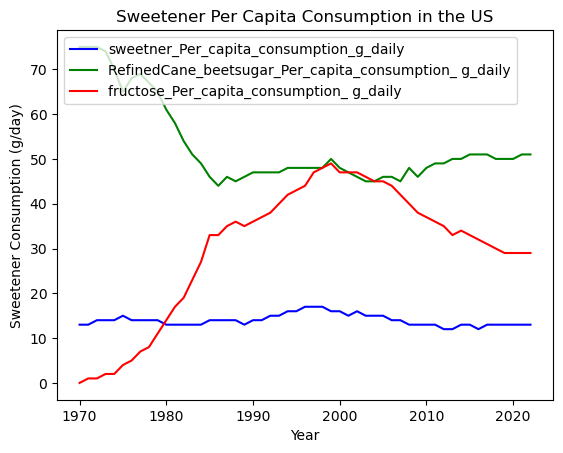

In [21]:
plt.figure(figsize=(20, 10))
lines = SugarConsumption_df.plot(x="Year", y=["sweetner_Per_capita_consumption_g_daily",'RefinedCane_beetsugar_Per_capita_consumption_ g_daily',
       'fructose_Per_capita_consumption_ g_daily'], style=["b-", "g-", "r-"]) 
plt.title("Sweetener Per Capita Consumption in the US")
plt.xlabel("Year")
plt.ylabel("Sweetener Consumption (g/day)")
plt.legend(loc="upper left")

In [22]:
sugar_merged_df = pd.merge(df,SugarConsumption_df,on="Year", how="inner")

In [28]:
sugar_merged_df['Data_Value'] = sugar_merged_df['Data_Value'].fillna(0)

In [31]:
sugar_merged_df['Confidence_limit_Low'] = sugar_merged_df['Confidence_limit_Low'].fillna(0)

In [32]:
sugar_merged_df['Confidence_limit_High'] = sugar_merged_df['Confidence_limit_High'].fillna(0)

In [48]:
sugar_merged_df.sort_values(by = 'Year', ascending=True )
df_reset_index = sugar_merged_df.reset_index(drop=True)
df_reset_index

,Year,LocationAbbr,County,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,AgeGroup,Race,Sex,LocationID,sweetner_Per_capita_consumption_g_daily,RefinedCane_beetsugar_Per_capita_consumption_ g_daily,fructose_Per_capita_consumption_ g_daily
0,2010,GA,Camden,Cardiovascular disease (CVD),1738.0,1515.5,1999.1,Ages 65 years and older,Overall,Women,13039,13,48,37
1,2010,FL,Clay,All heart disease,0.0,0.0,0.0,Ages 35-64 years,American Indian/Alaska Native,Overall,12019,13,48,37
2,2010,AZ,Pima,Cardiovascular disease (CVD),1302.0,1257.7,1351.8,Ages 65 years and older,Overall,Overall,4019,13,48,37
3,2010,AR,Grant,All stroke,0.0,0.0,0.0,Ages 65 years and older,Asian/Pacific Islander,Overall,5053,13,48,37
4,2010,CO,Logan,Coronary heart disease (CHD),27.2,21.5,35.5,Ages 35-64 years,Hispanic,Overall,8075,13,48,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499316,2019,AL,Jackson,Cardiovascular disease (CVD),1996.0,1850.7,2145.6,Ages 65 years and older,Overall,Overall,1071,13,50,29
499317,2019,ID,Clark,Coronary heart disease (CHD),0.0,0.0,0.0,Ages 65 years and older,Black (Non-Hispanic),Overall,16033,13,50,29
499318,2019,GA,Brooks,Cardiovascular disease (CVD),0.0,0.0,0.0,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29
499319,2019,GA,Brooks,Coronary heart disease (CHD),0.0,0.0,0.0,Ages 35-64 years,American Indian/Alaska Native,Overall,13027,13,50,29


In [42]:
df_filtered = sugar_merged_df[ (sugar_merged_df['Year'] >= 2015) & (sugar_merged_df['Year'] <= 2019) ]
df_filtered.reset_index(level=0, drop=True)
df_filtered.columns

Index(['Year', 'LocationAbbr', 'County', 'Topic', 'Data_Value',
       'Confidence_limit_Low', 'Confidence_limit_High', 'AgeGroup', 'Race',
       'Sex', 'LocationID', 'sweetner_Per_capita_consumption_g_daily',
       'RefinedCane_beetsugar_Per_capita_consumption_ g_daily',
       'fructose_Per_capita_consumption_ g_daily'],
      dtype='object')

In [41]:
df_filtered.to_csv("df_filtered.csv")

In [50]:
df_filtered.to_excel('df_test.xlsx')

In [49]:
sugar_merged_df.to_csv('fulldf.csv')

In [ ]:
#plt.figure(figsize=(60, 50))
#sns.boxplot(x="Year", y=["sweetner_Per_capita_consumption_g_daily", "RefinedCane_beetsugar_Per_capita_consumption_ g_daily", "fructose_Per_capita_consumption_ g_daily"],data = sugar_merged_df)
lines = sugar_merged_df.plot(x="Year", y=["sweetner_Per_capita_consumption_g_daily", "RefinedCane_beetsugar_Per_capita_consumption_ g_daily", "fructose_Per_capita_consumption_ g_daily"], style=["b-", "g-", "r-"])
plt.title("Sweetener Per Capita Consumption in the US")
plt.xlabel("Year")
plt.ylabel("Sweetener Consumption (g/day)")
plt.legend(loc="upper left")

In [ ]:
sns.boxplot(x='Year', y='sweetner_Per_capita_consumption_g_daily', data=sugar_merged_df)

In [ ]:
sns.scatterplot(x='Year', y='sweetner_Per_capita_consumption_g_daily', data=sugar_merged_df);
#sns.scatterplot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [ ]:
sns.scatterplot(x='Year', y='RefinedCane_beetsugar_Per_capita_consumption_ g_daily', data=sugar_merged_df);

In [ ]:
sns.scatterplot(x='Year', y='fructose_Per_capita_consumption_ g_daily', data=sugar_merged_df);

In [ ]:
drinking_intensity = pd.read_excel('../data/Drinking_intensity.xlsx')

In [ ]:
drinking_intensity